# Getting started with Tensorflow and Numpy

This tutorial will teach you the basics of two Python libraries: Numpy and Tensorflow.
We will you Numpy for data preprocessing and Tensorflow for training neural networks.

Let's start by validating your installation.

In [ ]:
import sys
import tensorflow as tf              # deep learning framework
import numpy as np                   # manipulation of matrices et al.
import matplotlib.pyplot as plt      # plotting library

major_version = sys.version_info[0]
if major_version < 3:
    print("You are running Python 2. This tutorial was tested in Python 3, " \
          "therefore, you might need to change some commands to make it work.")
else:
    print("Python ok.")
    
ver = tf.__version__.split(".")
tf_major = int(ver[0])
tf_minor = int(ver[1])

if tf_major < 1 or tf_minor < 12:
    print("You should upgrade your tensorflow to version 1.12.0.")
    print("Your version is:", tf.__version__)
else:
    print("Tensorflow ok.")

## Part 1: Numpy: arrays and elemetary operations

Numpy helps use manipulate objects such as vectors, matrices and tensor, which we are going to use to store our data.

Numpy arrays represent any such object with an arbitrary size and data type. Let's define a vector, a matrix and a tensor.

In [ ]:
vector = np.zeros((4,))
matrix = np.zeros((4, 4))
tensor = np.zeros((4, 4, 4))

print(vector)
print(vector.shape)
print(vector.dtype)

There are various ways of creating a Numpy array. *np.zeros* and *np.ones* do exactly what you would except, whereas *np.empty* does not overwrite the allocated memory, so the initial values in the array are not determined.

The *np.random* module is useful for creating random data for testing and for initializing a neural network.

In [ ]:
m_zeros = np.zeros((4, 4))
m_ones = np.ones((4, 4))
m_empty = np.empty((4, 4))

m_randint = np.random.randint(0, 5, size=(4, 4))
m_randunf = np.random.uniform(-1, 1, size=(4, 4))

print(m_empty)
print(m_randint)
print(m_randunf)

We can also manually assign the initial values in the array.

In [ ]:
m1 = np.array([
    [1, 2], 
    [3, 4]
], dtype=np.float32)

m2 = np.array([
    [5, 6], 
    [7, 8]
], dtype=np.float32)

m3 = np.ones((2, 3), dtype=np.float32)

The following two cells showcase the most common array operations. Notice the difference between point-wise and matrix products.

In [ ]:
add = m1 + m2
subtract = m1 - m2

point_wise_product = m1 * m2
matrix_product = np.matmul(m2, m3)

print(point_wise_product.shape)
print(matrix_product.shape)

In [ ]:
m1_transpose = np.transpose(m1)

print(m1)
print(m1_transpose)

Matrix operations are simple, but let's look at how Numpy handles operations over tensors. Tensor is a generalization of a matrix: it can have any number of dimensions. We will work with 3D tensors in the following cells.

In [ ]:
t1 = np.random.randint(0, 5, size=(2, 2, 2))
t2 = np.random.randint(0, 5, size=(2, 2, 2))
t3 = np.random.randint(0, 5, size=(2, 2, 4))

print(t1)
print(t1.shape)
print(t1.dtype)

Addition, subtraction and point-wise product are done in the same manner as for matrices. However, the tensor product is new. In this case, Numpy treats the tensors *t2* and *t3* as lists of two matrices, and performs the matrix product for each matrix separately.

In [ ]:
add = t1 + t2
subtract = t1 - t2

point_wise_product = t1 * t2
tensor_product = np.matmul(t2, t3)

print(point_wise_product.shape)
print(tensor_product.shape)

## Part 2: Tensorflow: Tensors and the computational graph

The training neural networks involves multiplying matrices, for the most part. We could implement everything that is taught in this course in Numpy, but it would be very time-consuming. In particular, Tensorflow automatically computes the gradients of all defined operations for us, which saves a lot of time.

This part of the tutorial is based on [Getting Started With TensorFlow](https://www.tensorflow.org/get_started/get_started).

There are two steps to running code in Tensorflow.
1. Creating a computation graph
2. Executing the defined operations

Let's start with a simple example.

In [ ]:
# Part 1: DEFINE A COMPUTATION GRAPH
x = tf.constant(2, tf.int32)
y = tf.constant(4, tf.int32)
add = tf.add(x, y)


# Part 2: RUN THE COMPUTATIONS
with tf.Session() as sess:
    result = sess.run(add)

print(result)

Instead of hardcoding the values, it's possible to provide them to the computational graph when we run it with **placeholders**.

In [ ]:
# define two placeholders
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)
# shortcut for tf.add(x, y)
add = x + y

# create a feed dictionary
feed_dict = {
    x: 3,
    y: 7
}

# run the operation
with tf.Session() as sess:
    result = sess.run(add, feed_dict=feed_dict)
    
print(result)

Now it's time for you to experiment with tensorflow operations.
#### Task 1:
Define a simple integer operation.

* input: x, y, z (integer placeholders - the same as above)

* output: x * y + z

In [ ]:
# TODO

So far, we've been dealing with integers, however, for machine learning tasks, we'll need to handle vectors and matrixes.

Tensorflow enables us to operate with **tensors**. Tensor is an array of any number of dimensions. Tensor's **rank** is its number of dimensions. In fact, the integer constants and placeholders we have been working with are all tensors of rank zero.

Remember the difference between the following:
* Numpy **array**: a N-dimensional object
* Tensorflow **Tensor**: an abstract object that represents some operation

Let's define a simple **linear model** for inputs with 2 features.

In [ ]:
# define the model
W = tf.constant([1, 2], tf.float32)
b = tf.constant(3, tf.float32)

x = tf.placeholder(tf.float32, shape=(2,))

linear_model = tf.tensordot(x, W, axes=1) + b

# test it with an input
feed_dict = {
    x: [2, 3]
}

with tf.Session() as sess:
    res = sess.run(linear_model, feed_dict=feed_dict)
    
print(res)

What if we want to train this model on some dataset using gradient descent? Gradient descent needs to alter the weights and biases, however, we've declared them as constants which are immutable. It's easy to fix that with **tf.Variable**.

In [ ]:
# define the model
W = tf.Variable([1, 2], dtype=tf.float32)
b = tf.Variable(3, dtype=tf.float32)

x = tf.placeholder(tf.float32, shape=(2,))

linear_model = tf.tensordot(W, x, axes=1) + b

# test it with an input
feed_dict = {
    x: [2, 3]
}

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    res = sess.run(linear_model, feed_dict=feed_dict)
    
print(res)

Now we are able to train our model. Notice that we must first initialize the instances of tf.Variable using the **global varibles initializer** at the start of *each* session.

## Part 3: Tensorflow: training a model

So far, we've declare an input placeholder and parameter variables. We're missing a labels placeholder and a loss tensor.

In [ ]:
y = tf.placeholder(tf.float32)

loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=linear_model, labels=y)
)

We're almost done. Tensorflow is going to calculate the gradients for us, we only need to define an optimizer.

In [ ]:
learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

That's it, we're done. Let's put it all together.

We will build a model for a synthetic binary classification task. Below, you can see data for positive and negative classes. We want our model to assign each point into the positive or the negative class based on the x and y coordinates (2 features).

In [ ]:
# draw 50 positive and 50 negative samples from two Gaussians
# positive: mean 4, std 1.5
# negative: mean 8, std 1.5
positive = np.random.normal(4, 1.5, size=(50, 2)).astype(np.float32)
negative = np.random.normal(8, 1.5, size=(50, 2)).astype(np.float32)

# plot the samples using pyplot
plt.scatter(positive[:, 0], positive[:, 1], c="b", marker="o")
plt.scatter(negative[:, 0], negative[:, 1], c="r", marker="x")

plt.show()

In [ ]:
# define the model

# weight and a bias
W = tf.Variable([[-0.005], [0.01]], dtype=tf.float32, name="W")
b = tf.Variable([0], dtype=tf.float32, name="b")

# placeholders for data and labels
x = tf.placeholder(tf.float32, shape=(None, 2), name="x")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

# multiply the data with the weights and add the bias
linear_model = tf.matmul(x, W) + b
# use sigmoid for predictions
prediction = tf.sigmoid(linear_model)

# define logistic regression loss
loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=linear_model, labels=y)
)

# define learning rate, optimizer and training op
learning_rate = 0.5

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

# training data
train_x = np.concatenate((positive, negative))
train_y = np.concatenate((np.ones((positive.shape[0], 1)), np.zeros((negative.shape[0], 1))))

# train the model
feed_dict = {
    x: train_x,
    y: train_y
}

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    
    # train for 1000 iteration
    for i in range(1000):
        sess.run(train, feed_dict=feed_dict)
        
    end_loss = sess.run(loss, feed_dict=feed_dict)
    end_W, end_b = sess.run([W, b])
    
    # plot the decision boundary and the data
    # source: https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
    xx, yy = np.mgrid[-2:14:.01, -2:14:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sess.run(prediction, feed_dict={
        x: grid
    })
    probs = probs.reshape(xx.shape)
    
    plt.scatter(positive[:, 0], positive[:, 1], c="b", marker="o")
    plt.scatter(negative[:, 0], negative[:, 1], c="r", marker="x")
    plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)    
    
print("loss %.1f" % end_loss)
print("W: {:.2f}, {:.2f}".format(end_W[0][0], end_W[1][0]))
print("b: %.1f" % end_b)

A visualization of the graph:

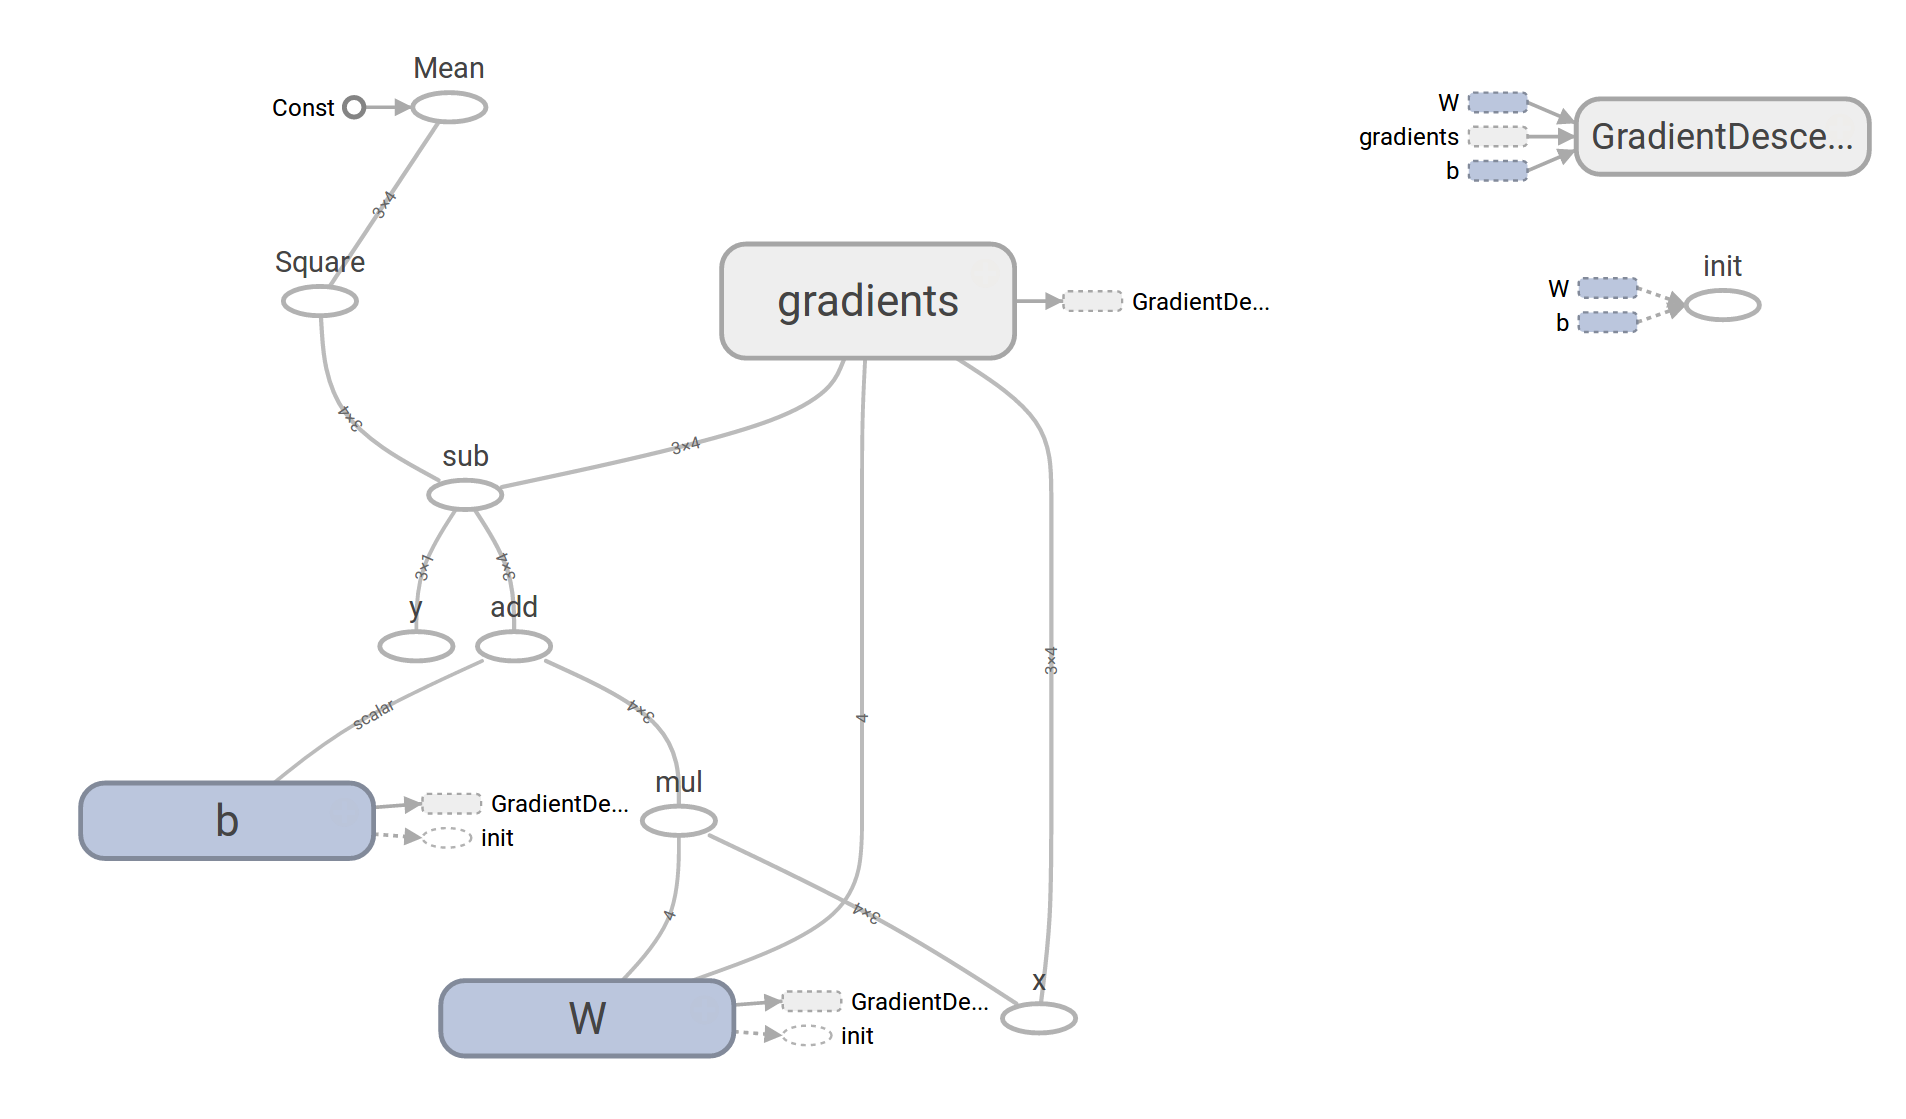